## Spaceship Titanic

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
pd.read_csv('sample_submission.csv').head(5) # Formato de subuida.

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [88]:
df = pd.read_csv('train.csv')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [90]:
df.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
6185,6531_01,Earth,True,G/1064/S,55 Cancri e,18.0,False,0.0,0.0,0.0,0.0,NaN,Rena Hineyley,True
820,0873_01,Earth,False,F/180/P,TRAPPIST-1e,16.0,False,NaN,0.0,32.0,2529.0,92.0,Garyan Franton,False
206,0221_04,Mars,True,E/13/S,TRAPPIST-1e,21.0,False,0.0,0.0,0.0,0.0,0.0,Eerch Reke,True
2682,2872_01,Earth,False,G/455/S,PSO J318.5-22,57.0,False,0.0,1431.0,0.0,30.0,337.0,Jonard Leblanchez,True
513,0550_01,Earth,False,F/99/S,TRAPPIST-1e,23.0,False,13.0,12.0,0.0,762.0,0.0,Maen Cleminglas,True
2860,3090_01,Europa,False,B/115/S,TRAPPIST-1e,27.0,True,0.0,6013.0,0.0,820.0,31.0,Minoces Myling,True
3730,4001_04,Earth,True,G/659/S,55 Cancri e,2.0,False,0.0,0.0,0.0,0.0,0.0,Carley Lowelliott,False
7219,7712_01,Europa,False,A/93/S,TRAPPIST-1e,25.0,True,1.0,4298.0,0.0,0.0,2.0,Alphact Gealter,True
2137,2295_01,Earth,False,F/466/P,TRAPPIST-1e,75.0,False,0.0,0.0,1224.0,NaN,1769.0,Melica Emenez,False
6499,6859_01,Earth,True,G/1113/S,PSO J318.5-22,29.0,False,0.0,0.0,0.0,0.0,0.0,Blancy Harry,True


### Data Preprocessing:

#### PassengerId:

 Vemos que tiene la forma *gggg_pp* donde la *g* representa el grupo en el que se encuentra el pasajero y *p* representa el número de gente del grupo. Generalmente cada grupo representa una familia. Dejamos esta parámetro para el final. Es tipo string y tiene 8693 registros.

#### HomePlanet:

Origin planet od the passenger. We've got 201 nulls in the parameter. Must create dummy variables for each planet. How should we treat category parameters in which rows this category is null?

In [91]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

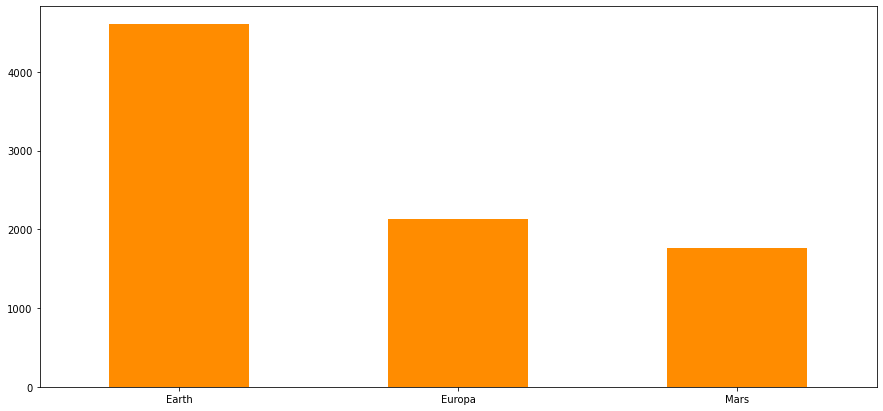

In [92]:
pd.get_dummies(df['HomePlanet']).sum().\
    plot.bar(rot=0, color = 'darkorange', figsize = (15, 7));

* Aproximetly the half of the passenger of the Titanic were from planet Earth.

In [93]:
df = pd.concat([df, pd.get_dummies(df['HomePlanet'])], axis=1).\
    drop(columns={'HomePlanet'}) # Añadimos las variables dummy a la vez que suprimimos la variable HomePlanet.

#### Cryosleep:

Boolean variable: Here we can have the intuiton that a passenger can or can't be cryosleeped so we can create just one parameter that takes this in consideration, however, since we have nulls values in the parameter we will take both cases, so we can identify the passengers who we don't know if they were cryosleeping:

Another reflection made here is that probaly it the impact affected more to the people who weren't cryosleeping, so lets take only those cases.

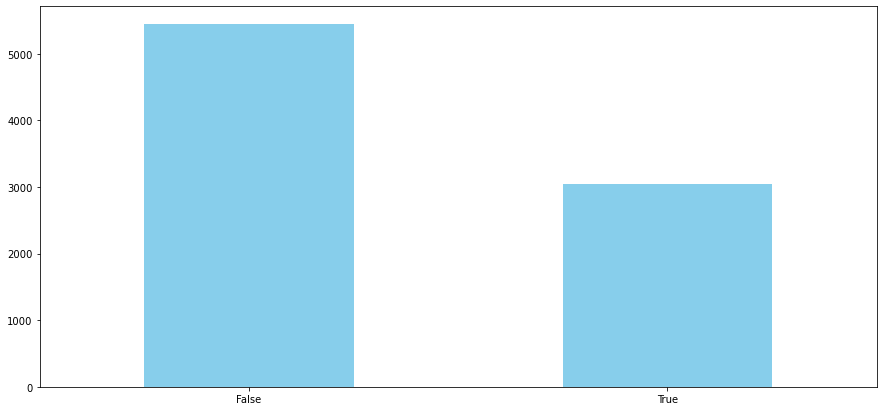

In [95]:
pd.get_dummies(df['CryoSleep']).sum().\
    plot.bar(rot=0, color = 'skyblue', figsize = (15, 7));

* Only one third of the passengers were cryosleeping

In [96]:
df = pd.concat([df, pd.get_dummies(df['CryoSleep'])], axis=1).\
    rename(columns={True:'cryosleeper', False:'no_cryosleeper'}).\
    drop(columns={'CryoSleep', 'no_cryosleeper'})
    

#### Cabin

From this cabin parameter we will only look if the cabin of the passenger were on the port *P* or the starboard *S*. Maybe the impact with the wormhole affected more one side of the spaceship.

Since we have null values the first steep is to treat them:

In [98]:
df['Cabin'].fillna('x/0/x', inplace = True) # cast the null values to string and the same format as the not null values in order to process them.

In [99]:
df['Side'] = [ df['Cabin'].str.split('/')[x][2] for x in range(len(df)) ]

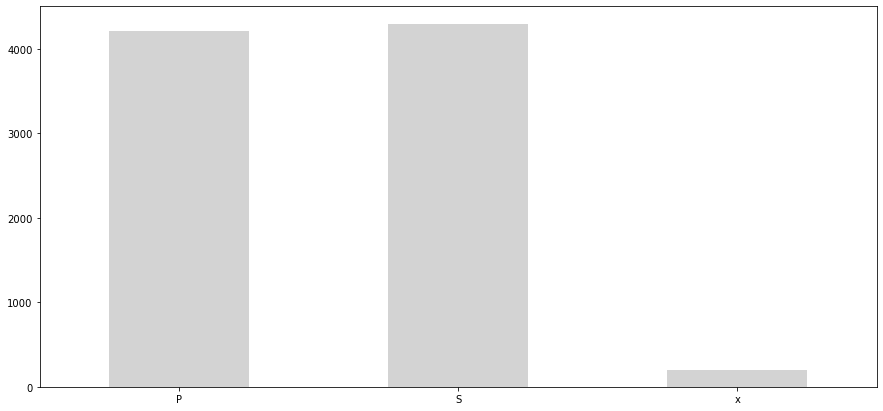

In [100]:
pd.get_dummies(df['Side']).sum().\
    plot.bar(rot=0, color = 'lightgrey', figsize = (15, 7));

* We can see how the passengers are well distribuited along the spaceship. If this parameter takes importance to the model we'll demonstrate that the impact affected one side more than the other.

In [101]:
df = pd.concat([df, pd.get_dummies(df['Side'])], axis = 1).\
    drop(columns={'Side', 'x', 'Cabin'}).\
    rename(columns={'P':'port_cabin', 'S':'starboard_cabin'})

#### Destination

We will check if the destination of the passenger was a factor in order to be affected for the impact. Since its a category we must follow the same strategy:

In [103]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [104]:
df = pd.concat([df, pd.get_dummies(df['Destination'])], axis = 1).\
    drop(columns={'Destination'}).\
    rename(columns={'TRAPPIST-1e':'destination_trappist', 'PSO J318.5-22':'destination_pso', '55 Cancri e':'destination_cancri'})

#### Age

In this case we will normalize the variable. To treat the null values we will fill them with random values in the range of our data that don't change the statistical description of our distribution.

We should avoid fill the nulls with just one value like the mean or the median because then the model will take those values more in account. In order to achieve this we will simulate the ages of the passengers that we dont have.

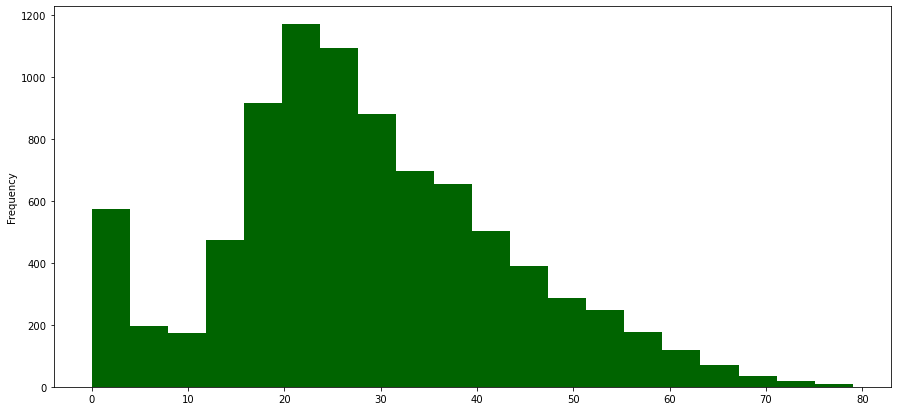

In [133]:
df['Age'].plot.hist(bins=20, color='darkgreen', figsize=(15,7));

In [131]:
df['Age'].fillna(np.random.normal(df['Age'].mean(), df['Age'].std()), inplace=True) # We work with a normal distribution without taking in consideration the skewness, unlike the real distribution of ages.

In [135]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['norm_age'] = scaler.fit_transform(np.array(df['Age']).reshape(-1, 1))
df.drop(columns={'Age'}, inplace=True)

#### VIP

As we did with the CryoSleep parameter we create two paramaters from VIP through *get_dummies* function. Since we can see how there are quite less VIP passengers than regular passengers we will assume that all the null values weren't VIP (because it is expected that most of them weren't).

<AxesSubplot:>

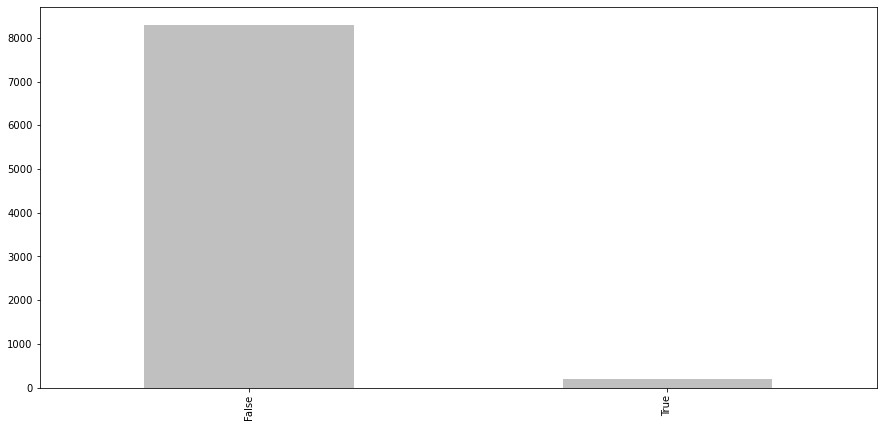

In [143]:
pd.get_dummies(df['VIP']).sum().plot.bar(color='silver', figsize=(15,7))

In [147]:
df = pd.concat([df, pd.get_dummies(df['VIP'])], axis = 1).\
    drop(columns={'VIP', False}).\
    rename(columns={True:'VIP'})

In [148]:
df.head(15)

,PassengerId,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars,cryosleeper,port_cabin,starboard_cabin,destination_cancri,destination_pso,destination_trappist,norm_age,VIP
0,0001_01,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,0,1,0,0,0,1,0.493671,0
1,0002_01,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,0,0,1,0,0,1,0.303797,0
2,0003_01,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,0,0,1,0,0,1,0.734177,1
3,0003_02,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,0,0,1,0,0,1,0.417722,0
4,0004_01,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,0,0,1,0,0,1,0.202532,0
5,0005_01,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,1,0,0,0,1,0,0,1,0,0.556962,0
6,0006_01,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,1,0,0,0,0,1,0,0,1,0.329114,0
7,0006_02,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,1,0,0,1,0,1,0,0,1,0.354430,0
8,0007_01,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,1,0,0,0,0,1,0,0,1,0.443038,0
9,0008_01,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0,1,0,1,1,0,1,0,0,0.177215,0


#### Passenger Luxury Expenses: RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

Since all these variables have the same nature we will treat them equally. 

As their name suggest they are luxury expenses so we will follow the next strategy:



In [166]:
# vip_passengers_expenses = df['PassengerId' , 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


vip_passengers_expenses = df[['PassengerId' , 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].loc[df['VIP'] == 1]
crysleepers_expenses = df[['PassengerId' , 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].loc[df['cryosleeper'] == 1]
no_vip_passengers_expenses = df[['PassengerId' , 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].loc[df['VIP'] == 0]

In [164]:
vip_passengers_expenses.describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,195.000000,193.000000,194.000000,197.000000,195.000000
mean,473.615385,1811.393782,247.726804,760.710660,1234.856410
std,1098.363713,3758.336442,587.449429,1622.153873,2453.060817
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,287.000000,0.000000,39.000000,30.000000
75%,528.500000,2191.000000,161.500000,843.000000,1377.500000
max,8243.000000,29813.000000,3700.000000,13902.000000,12424.000000


In [165]:
crysleepers_expenses.describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,2969.0,2967.0,2941.0,2972.0,2975.0
mean,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0


In [169]:
no_vip_passengers_expenses.describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8317.000000,8317.000000,8291.000000,8313.000000,8310.000000
mean,218.851268,426.672839,171.997708,300.484903,283.031649
std,652.154158,1512.466562,605.020213,1120.611594,1087.291188
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,57.000000,25.000000,53.000000,40.000000
max,14327.000000,27071.000000,23492.000000,22408.000000,24133.000000
